In [1]:
!pip install torchvision

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import torchvision
from torchvision import transforms, datasets

In [3]:
data_path = 'ASL/asl_alphabet_train/asl_alphabet_train'

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(128,128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.Lambda(lambda x: x.squeeze())
])

In [4]:
dataset = datasets.ImageFolder(data_path, transform=transform1)
num_samples = len(dataset)
dataset

Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ASL/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               Lambda()
           )

In [5]:
indices = torch.randperm(num_samples)

split = int(num_samples * 0.2)

train_dataset = torch.utils.data.Subset(dataset, indices[split:])
test_dataset = torch.utils.data.Subset(dataset, indices[:split])

len(train_dataset), len(test_dataset)

(69600, 17400)

In [6]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=32, 
    shuffle=True, 
    num_workers=4)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4)

In [7]:
classes = dataset.classes
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [8]:
train_dataset[0][0].numpy()

array([[0.11717881, 0.11984904, 0.1156333 , ..., 0.11392732, 0.1176504 ,
        0.12045284],
       [0.11665612, 0.29465243, 0.36540365, ..., 0.28039688, 0.27137917,
        0.17542063],
       [0.1181255 , 0.37674227, 0.4862461 , ..., 0.323713  , 0.34179425,
        0.19866404],
       ...,
       [0.11618745, 0.08697003, 0.08398029, ..., 0.59568083, 0.60055023,
        0.30635178],
       [0.11890708, 0.09731939, 0.09906723, ..., 0.595073  , 0.5983662 ,
        0.3055719 ],
       [0.12259374, 0.10765294, 0.10968927, ..., 0.3044464 , 0.30516407,
        0.18983398]], shape=(128, 128), dtype=float32)

In [9]:
train_dataset[0][0].numpy().shape

(128, 128)

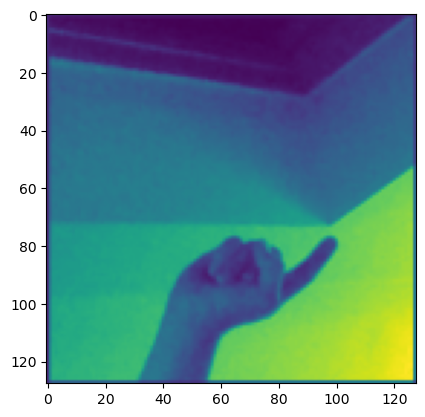

This is  Z


In [21]:
n=int(np.random.rand()*10000)

plt.imshow(train_dataset[n][0])
label=train_dataset[n][1]
plt.show()
print('This is ', classes[label])